In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV
import os

import warnings
warnings.filterwarnings('ignore')

Future Engineering

In [3]:
data = pd.read_csv('train.csv')
data

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [4]:
#Данные и так оказались в числовом формате.
# numeric_cols = ['Popularity', 'energy', 'danceability', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms']
# data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Размерность данных
print(f"Размер данных: {data.shape}")

# Типы данных
print("\nТипы данных в столбцах:")
print(data.dtypes)

# Пропуски
print("\nКоличество пропущенных значений:")
print(data.isnull().sum())

# Основные статистики
print("\nОсновные статистики числовых столбцов:")
print(data.describe())

Размер данных: (17996, 17)

Типы данных в столбцах:
Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

Количество пропущенных значений:
Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in 

Дубликатов в датасете нет.

In [5]:
print(len(data))
data = data.drop_duplicates()
print(len(data))

17996
17996


Было принято решение удалить все строки с пропусками. Объём данных позволяет, и инструментальность может быть очень важным параметром.

In [6]:
data_without_passes = data.copy()
data_without_passes.dropna(inplace=True)
print(data_without_passes.shape)

(11813, 17)


Первым делом - мы не удаляем выбросы по простой причине - например громкость зависит от жанра, что очень легко проследить. Все жанры кроме 7-ого относительно громкие, выбросы также везде разные. Так например у 0, 3 и 4-ого класса они минимальны. Также и со всеми остальными параметрами!

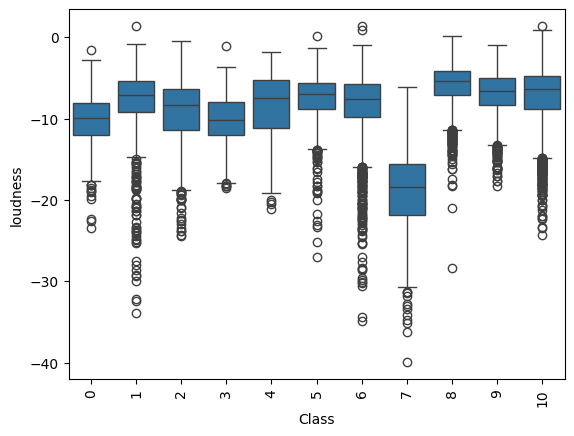

In [7]:
sns.boxplot(x='Class', y='loudness', data=data)
plt.xticks(rotation=90)
plt.show()

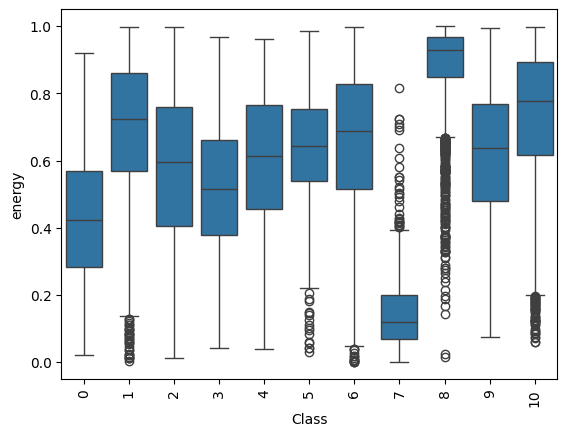

In [8]:
sns.boxplot(x='Class', y='energy', data=data)
plt.xticks(rotation=90)
plt.show()

Нечисловые столбцы:
Index(['Artist Name', 'Track Name'], dtype='object')


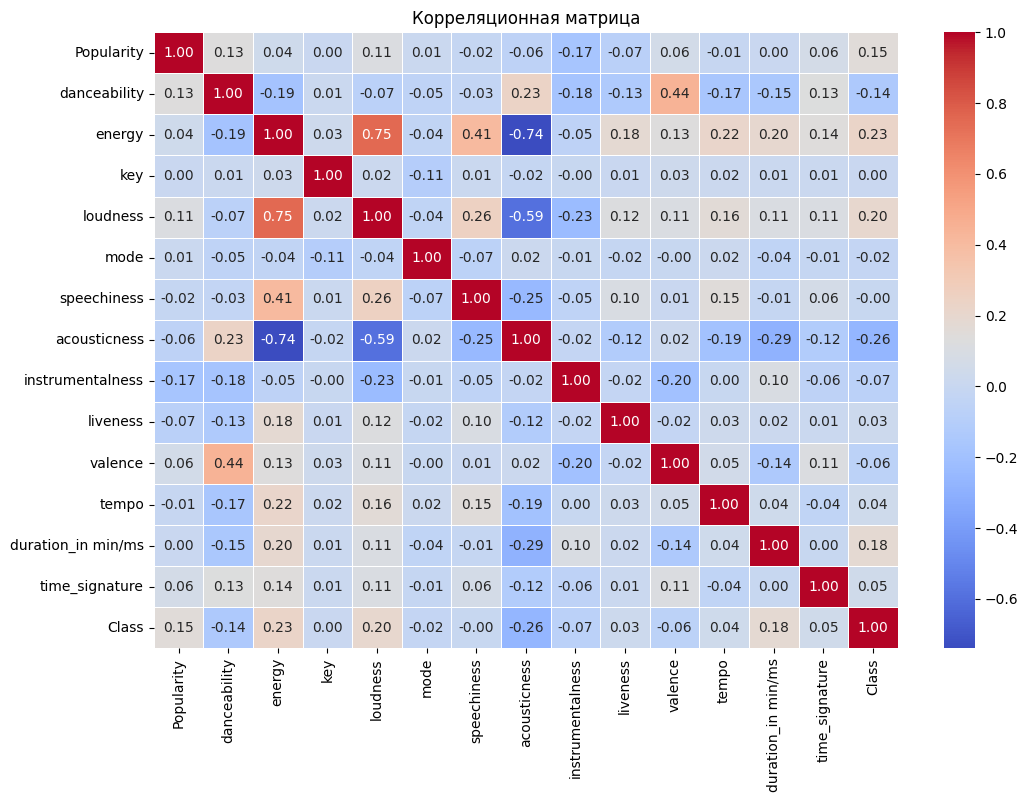

In [9]:
corr_matrix = data.select_dtypes(include=['number']).corr(method='spearman')
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
df = data_without_passes.drop(non_numeric_columns, axis=1)
print("Нечисловые столбцы:")
print(non_numeric_columns)


corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()



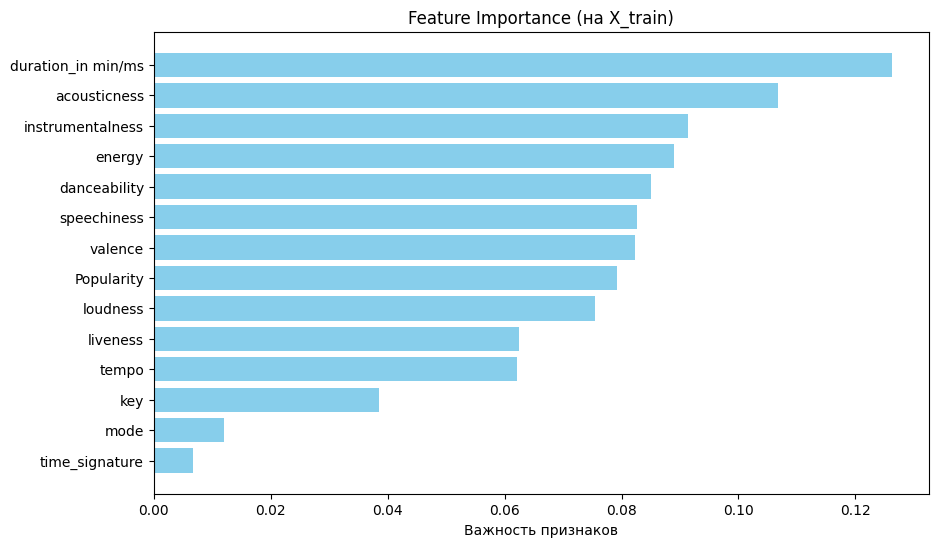

Accuracy: 0.3643673296656792
              precision    recall  f1-score   support

           0       0.51      0.73      0.60        67
           1       0.06      0.03      0.04       227
           2       0.32      0.33      0.33       187
           3       0.78      0.60      0.68        58
           4       0.54      0.48      0.51        31
           5       0.23      0.10      0.13        94
           6       0.25      0.28      0.26       407
           7       0.86      0.83      0.85        83
           8       0.49      0.50      0.50       306
           9       0.30      0.25      0.27       215
          10       0.36      0.43      0.39       688

    accuracy                           0.36      2363
   macro avg       0.43      0.42      0.41      2363
weighted avg       0.35      0.36      0.35      2363



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

features = df.drop(columns=['Class'])
target = df['Class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel('Важность признаков')
plt.title('Feature Importance (на X_train)')
plt.show()

# Выбираем важные признаки на основе результата
important_features = X_train.drop(
    columns=['time_signature', 'mode', 'key', 'tempo', 'liveness', 'loudness', 'danceability', 'energy', 'valence', 'speechiness']
).columns.to_list()

X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Обучаем финальную модель
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [11]:
common = pd.merge(X_train, X_test, how='inner')
print(f'Количество совпадающих строк: {len(common)}')

Количество совпадающих строк: 447


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 8),
    'subsample': uniform(0.8, 0.2)
}

model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_selected, y_train)
print("Лучшие параметры:", random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Лучшие параметры: {'learning_rate': np.float64(0.012306242504141576), 'max_depth': 5, 'n_estimators': 158, 'subsample': np.float64(0.8799721943430512)}


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
# Обучение модели с лучшими параметрами
best_gb_model = GradientBoostingClassifier(
    learning_rate=0.123,
    max_depth=5,
    n_estimators=158,
    subsample=0.88,
    random_state=42
)

best_gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_best = best_gb_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.3643673296656792
              precision    recall  f1-score   support

           0       0.51      0.73      0.60        67
           1       0.06      0.03      0.04       227
           2       0.32      0.33      0.33       187
           3       0.78      0.60      0.68        58
           4       0.54      0.48      0.51        31
           5       0.23      0.10      0.13        94
           6       0.25      0.28      0.26       407
           7       0.86      0.83      0.85        83
           8       0.49      0.50      0.50       306
           9       0.30      0.25      0.27       215
          10       0.36      0.43      0.39       688

    accuracy                           0.36      2363
   macro avg       0.43      0.42      0.41      2363
weighted avg       0.35      0.36      0.35      2363

